## Построение графика по количесту зарегистрированных разводов за месяц с 2009 по 2021 год


Официальные данные РОССТАТ экспортированы с сайта: 
     'http://bi.gks.ru/biportal/contourbi.jsp?allsol=1&solution=Dashboard'

Импорт библиотеки pandas (для работы с табличными данными) и pyplot для построения графика

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#  Подключаем модуль управления тиками:
import matplotlib.ticker as ticker

Загрузка в датафрейм pandas из csv 

In [2]:
df = pd.read_csv('divorce_marriage.csv', encoding='ansi')

Отображение датафрейма

In [3]:
df

,territory,id_indicator,period,territory.ccube.0,territory.ccube.1,territory.ccube.2,territory.ccube.attr.0,territory.ccube.3,territory.ccube.4,value
0,643,814,31 Jan 2009 00:00:00,Российская Федерация,NaN,NaN,1,Российская Федерация,Российская Федерация,5.44
1,643,814,28 Feb 2009 00:00:00,Российская Федерация,NaN,NaN,1,Российская Федерация,Российская Федерация,6.39
2,643,814,31 Mar 2009 00:00:00,Российская Федерация,NaN,NaN,1,Российская Федерация,Российская Федерация,6.05
3,643,814,30 Apr 2009 00:00:00,Российская Федерация,NaN,NaN,1,Российская Федерация,Российская Федерация,6.65
4,643,814,31 May 2009 00:00:00,Российская Федерация,NaN,NaN,1,Российская Федерация,Российская Федерация,6.06
...,...,...,...,...,...,...,...,...,...,...
28873,10000000,816,31 Dec 2021 00:00:00,Российская Федерация,Дальневосточный федеральный округ,Амурская область,3,Амурская область,Амурская область,5.60
28874,44000000,816,31 Dec 2021 00:00:00,Российская Федерация,Дальневосточный федеральный округ,Магаданская область,3,Магаданская область,Магаданская область,5.90
28875,64000000,816,31 Dec 2021 00:00:00,Российская Федерация,Дальневосточный федеральный округ,Сахалинская область,3,Сахалинская область,Сахалинская область,5.00
28876,99000000,816,31 Dec 2021 00:00:00,Российская Федерация,Дальневосточный федеральный округ,Еврейская автономная область,3,Еврейская автономная область,Еврейская автономная область,6.40


    - id_indicator - это id показателя (браки = 814, разводы = 816)
    - territory.ccube.(0-2) - это идентификатор уровня субъекта (0 - страна, 1 - федеральный округ, 2 - область или округ)
*В связи с этим составим датафрейм, выбрав только нужный нам субъект и показатель*

In [36]:
orel_df = df.loc[(df['territory.ccube.3'] == 'Орловская область') & (df['id_indicator'] == 814)]

Отображение нового датафрейма по бракам для Орловской области после удаления лишних колонок

In [101]:
new_df = orel_df.drop(["territory", "id_indicator", "territory.ccube.0", "territory.ccube.1", "territory.ccube.2", "territory.ccube.attr.0", "territory.ccube.3", "territory.ccube.4"], axis=1)

In [84]:
new_df

,period,value
1584,31 Jan 2009 00:00:00,5.16
1585,28 Feb 2009 00:00:00,6.84
1586,31 Mar 2009 00:00:00,5.61
1587,30 Apr 2009 00:00:00,6.20
1588,31 May 2009 00:00:00,5.58
...,...,...
27950,31 Aug 2021 00:00:00,6.30
28138,30 Sep 2021 00:00:00,6.60
28326,31 Oct 2021 00:00:00,6.50
28514,30 Nov 2021 00:00:00,6.30


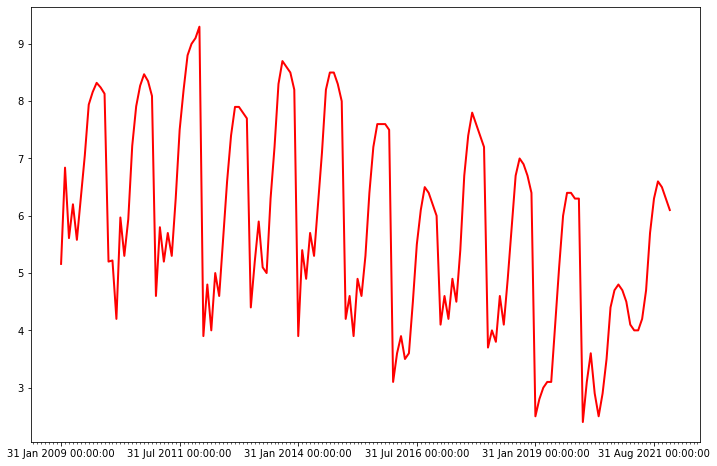

In [14]:
fig, ax = plt.subplots()

x = new_df['period']
y = new_df['value']

ax.plot(x, y, color = 'r', linewidth = 2)

#  Исправление формата подписей оси x
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))


fig.set_figwidth(12)
fig.set_figheight(8)

plt.show()

## Построение графика автокорреляционной функции

Импорт необходимых библиотек (если нет, установить через !pip install)

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

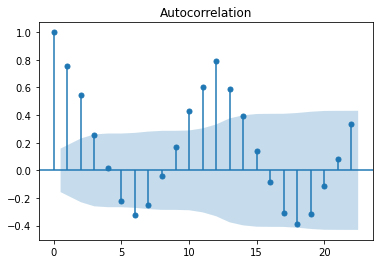

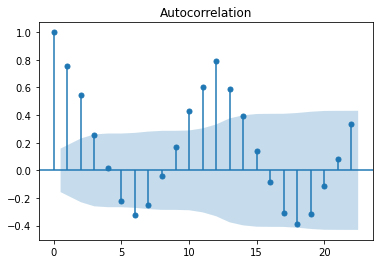

In [15]:
plot_acf(new_df['value'])

## Тест Дикки-Фуллера

In [10]:
import statsmodels as sm

In [11]:
test = sm.tsa.stattools.adfuller(orel_df['value'])
print('adf: ', test[0]) 
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -1.6855543395519295
p-value:  0.4385702627984426
Critical values:  {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}
есть единичные корни, ряд не стационарен


### Немного полезных ссылок 
https://maxdrive.kyiv.ua/dokumentacija/pochta/kak-sdelat-vremennoj-rjad-stacionarnym-python
http://distrland.blogspot.com/2020/06/python_28.html

## Приведение ряда к стационарному виду

Имеем следующий датафрейм:

In [102]:
new_df

,period,value
1584,31 Jan 2009 00:00:00,5.16
1585,28 Feb 2009 00:00:00,6.84
1586,31 Mar 2009 00:00:00,5.61
1587,30 Apr 2009 00:00:00,6.20
1588,31 May 2009 00:00:00,5.58
...,...,...
27950,31 Aug 2021 00:00:00,6.30
28138,30 Sep 2021 00:00:00,6.60
28326,31 Oct 2021 00:00:00,6.50
28514,30 Nov 2021 00:00:00,6.30


Создадим из него тестовый датафрейм, с которым будем производить все преобразования:

In [103]:
stat_df = new_df

In [104]:
stat_df

,period,value
1584,31 Jan 2009 00:00:00,5.16
1585,28 Feb 2009 00:00:00,6.84
1586,31 Mar 2009 00:00:00,5.61
1587,30 Apr 2009 00:00:00,6.20
1588,31 May 2009 00:00:00,5.58
...,...,...
27950,31 Aug 2021 00:00:00,6.30
28138,30 Sep 2021 00:00:00,6.60
28326,31 Oct 2021 00:00:00,6.50
28514,30 Nov 2021 00:00:00,6.30


Импортируем библиотеку NumPy, т.к. там имеется функция логарифмирования

In [105]:
import numpy as np

Преобразования используются для стабилизации непостоянной дисперсии ряда. Общие методы преобразования включают степенное преобразование, квадратный корень и логарифмическое преобразование. В нашем случае используем логарифмирование

In [106]:
stat_df['value_log'] = np.log(stat_df['value'])

In [107]:
stat_df

,period,value,value_log
1584,31 Jan 2009 00:00:00,5.16,1.640937
1585,28 Feb 2009 00:00:00,6.84,1.922788
1586,31 Mar 2009 00:00:00,5.61,1.724551
1587,30 Apr 2009 00:00:00,6.20,1.824549
1588,31 May 2009 00:00:00,5.58,1.719189
...,...,...,...
27950,31 Aug 2021 00:00:00,6.30,1.840550
28138,30 Sep 2021 00:00:00,6.60,1.887070
28326,31 Oct 2021 00:00:00,6.50,1.871802
28514,30 Nov 2021 00:00:00,6.30,1.840550


Для того, чтобы избавиться от меняющегося среднего выполним разницу последовательных членов в ряду

In [108]:
stat_df['value_diff'] = stat_df['value_log'] - stat_df['value_log'].shift(1)

При выполнении такого преобразования первый член ряда будет неопределён. Проверим ряд на наличие пустого значения и убедимся в этом

In [109]:
stat_df.isna().sum()

period        0
value         0
value_log     0
value_diff    1
dtype: int64

Видим одно пустое значение. Удалим его из ряда для дальнейшей работы методом notnull

In [111]:
stat_df = stat_df[pd.notnull(stat_df['value_diff'])]

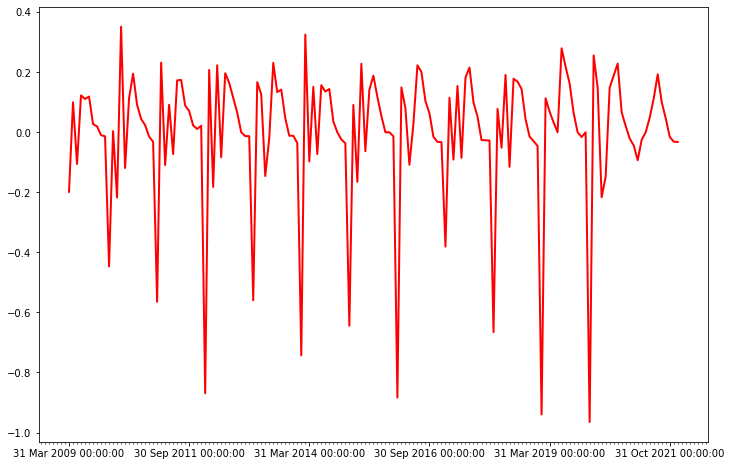

In [99]:
fig, ax = plt.subplots()

x = stat_df['period']
y = stat_df['value_diff']

ax.plot(x, y, color = 'r', linewidth = 2)

#  Исправление формата подписей оси x
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))


fig.set_figwidth(12)
fig.set_figheight(8)

plt.show()

In [100]:
test = sm.tsa.stattools.adfuller(stat_df['value_diff'])
print('adf: ', test[0]) 
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -4.063830669526737
p-value:  0.001110789997736591
Critical values:  {'1%': -3.4776006742422374, '5%': -2.882265832283648, '10%': -2.5778219289774156}
единичных корней нет, ряд стационарен


Получили стационарный временной ряд.